# Исследование надежности заемщиков.

### Шаг 1. Обзор данных

In [665]:
import pandas as pd #импорт библиотеки pandas 
import seaborn as sns #импорт библиотеки seaborn
df = pd.read_csv('/datasets/data.csv') #чтение файла с данными и сохранение в переменную df
display(df.head(20)) #вывод первых 10 строк таблицы
df.info() #получение информации о данных в таблице

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB



Видно что в столбцах `days_employed ` и `total_income` были пропущены часть значений, так как строк в них меньше чем в остальных столбцах. Возможно данных в этих строках нет, из-за отсутсвия информации или ее утери при заполнении таблицы или же люди не предоставили эти данные

Также сразу видны ошибки в данных, в столбце `days_employed` присутствуют отрицательные значения, а в столбце `education` присутствуют дубликаты, ошибки скорей всего получились из-за человеческого фактора

### Шаг 2.1 Заполнение пропусков

In [666]:
df.isna().sum() #подсчет пропущенных значений

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Во время просмотра первых строк таблицы было замечено, что строки где не указан стаж, могут совпадать со строками в которых не указан доход

In [667]:
filter_days_nan = df['days_employed'].isna() #Фильтр только тех значений в столбце days_employed, которые отсутствуют
filter_income_nan = df['total_income'].isna() #Фильтр только тех значений в столбце total_income, которые отсутствуют
df.loc[filter_days_nan & filter_income_nan].info() #Получение информации о таблице в которой остались лишь строки с пустыми
#значениями в столбцах days_employed и total_income одновременно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
children            2174 non-null int64
days_employed       0 non-null float64
dob_years           2174 non-null int64
education           2174 non-null object
education_id        2174 non-null int64
family_status       2174 non-null object
family_status_id    2174 non-null int64
gender              2174 non-null object
income_type         2174 non-null object
debt                2174 non-null int64
total_income        0 non-null float64
purpose             2174 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Все строки, в которых не указан стаж совпадают с теми в которых не указан доход, что скорей всего говорит о том, что эти данные не были указаны клиентами

In [668]:
df['days_employed'].isna().sum()/df['children'].count()*100 #Подсчет отношения пропущенных значений в процентах 
                                              #(столбец children взят так как он не содержит пропущенных значений )

10.099883855981417

Получается что каждое десятое значение в столбцах `days_emolyed` и `total_income` пропущены, но эти данные нам нужны так как их достаточно много и они могут повлиять на итоговый вывод, следовательно надо взять медианные значения и подставить их вместо пропусков (медианные лучше всего отразят данные, так как среднее значение будет не объективно из-за наличия малого количества с большими или маленькими доходами и стажем, которые будут искажать среднее значение) 


In [669]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].mean()) #заполнение пропущенных значений в days_emoloyed медианными
df['total_income'] = df['total_income'].fillna(df['total_income'].mean())#заполнение пропущенных значений в total_income медианными
display(df.head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Шаг 2.2 Проверка данных на аномалии и исправления.

В таблице в столбце `days_emolyed` присутствуют проблемы и аномальные значения. Во-первых там часть значений являются отрицательными, что скорей всего было сделано по ошибке и надо сделать из этих значений положительные, во-вторых, положительные значения слишком большие (например 400281 дней, что равняется примерно 1111 годам), скорей всего значения были увеличены примерно в 100 раз. Также в столбце `dob_years` есть значения 0, что скорей всего было сделано по ошибке, но так как эти данные не важны для нашего исследования, можно их оставить как есть. В стобце `gender` также помимо женского и мужского полов есть значение XNA, но этот столбец также не важен для нашего исследования. В столбце `children` присутствуют значения -1, которые лучше всего будет изменить на нулевые.

In [670]:
df['days_employed'].loc[df['days_employed']>0] = df['days_employed']/100 #Деление на 100 всех значений в столбце days_employed на 100
df['days_employed'] = abs(df['days_employed']) # приведение всех отрицательных значений к положительным
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,3402.660720,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [671]:
df['days_employed'].abs()

0        8437.673028
1        4024.803754
2        5623.422610
3        4124.747207
4        3402.660720
            ...     
21520    4529.316663
21521    3439.374041
21522    2113.346888
21523    3112.481705
21524    1984.507589
Name: days_employed, Length: 21525, dtype: float64

In [672]:

df['children'].loc[df['children'] < 0] = df['children']+1 #изменение всех значений -1 на 0
df['children'].value_counts() #проверка работы

0     14196
1      4818
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

### Шаг 2.3. Изменение типов данных.

Для удобства представления данных лучше всего значения в столбцах `days_employed` и `total_income` изменить с вещественных(float) на целочисленный(integer)

In [673]:
df=df.astype({'days_employed':'int','total_income':'int'})
display(df.head(10))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### Шаг 2.4. Удаление дубликатов.

In [674]:
df.duplicated().sum() #подсчет явных дубликатов в датафрейме

54

In [675]:
df = df.drop_duplicates().reset_index(drop=True) #удаление явных дубликатов и изменение индексов
df.duplicated().sum() #проверка на наличие явных дубликатов после их удалений

0

In [676]:
df.duplicated().sum()

0

In [677]:
df['education'].value_counts() #подсчет уникальных значений в столбце education


среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [678]:
df['family_status'].value_counts() #подсчет уникальных значений в столбце family_status

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [679]:
df['gender'].value_counts() #подсчет уникальных значений в столбце gender

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [680]:
df['income_type'].value_counts() #подсчет уникальных значений в столбце income_type

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [681]:
df['purpose'].value_counts() #подсчет уникальных значений в столбце purpose

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
операции с жильем                         652
покупка жилья для сдачи                   652
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

При проверке на наличие дубликатов дубликаты были найдены в столбце `education`

In [682]:
df['education'] = df['education'].str.lower() #приведение всех букв в значениях столбца education к нижнему регистру
df['education'].value_counts() 

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [683]:
df.duplicated().sum()

17

In [684]:
df = df.drop_duplicates().reset_index(drop=True) #удаление явных дубликатов и изменение индексов
df.duplicated().sum() #проверка на наличие явных дубликатов после их удалени

0

После приведения всех названий в столбце `education` появилось еще 17 дубликатов, которые нужно удалить

Приведение всех значений к нижнему регистру в столбце `education` позволило избавиться от всех дубликатов

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Для удобства представления, анализа данных и уменьшения размера таблицы было решено выделить специальные "датафреймы-словари"

In [685]:
df_education = df[['education_id','education']] #создание нового датафрейма-словаря для данных по образованию
df_education = df_education.drop_duplicates().reset_index(drop=True) #удаление дубликатов в новом датафрейме
display(df_education)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [686]:
df_family = df[['family_status_id','family_status']] #создание нового датафрейма-словаря для данных по семейному положению
df_family = df_family.drop_duplicates().reset_index(drop=True) #удаление дубликатов в новом датафрейме
display(df_family)

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [687]:
df = df.drop(['education','family_status'], axis=1) #удаление столбцов education и family_status в исходном датафрейме
display(df.head(10))

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,3402,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,1,0,M,сотрудник,0,135823,образование
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи


### Шаг 2.6. Категоризация дохода.

In [688]:
def income_category(total_income): #Функция для определения категории дохода на основании ежемесячного дохода
    try:
         if (total_income >= 0)&(total_income<=30000):
                return 'E'
         elif (total_income > 30000)&(total_income<=50000):
                return 'D'
         elif (total_income > 50000)&(total_income<=200000):
                return 'C'
         elif (total_income > 200000)&(total_income<=1000000):
                return 'B'
         elif (total_income > 1000000):
                return 'A'
    except: 
        print('Данные представленны некорректно')
        
df['total_income_category'] = df['total_income'].apply(income_category) #Применение функции датафрейма и создание нового столбца на основе полученных значений
display(df.head(10))

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,3402,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


In [689]:
df['total_income_category'].value_counts() #Проверка работы фукции и просмотр количества клиентов разных категорий дохода

C    16016
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

Из полученных данных мы видим что большинство клиентов находится в категориях доходности C(50001–200000) и B(200001–1000000), остальные категории представлены в очень малом количестве 

### Шаг 2.7. Категоризация целей кредита.

In [690]:
def purpose_categories(purpose): #функция для категоризации целей получения кредита
    try:
        if 'авто' in purpose:
            return 'операции с автомобилем'
        if 'недв' in purpose:
            return 'операции с недвижимостью'
        if 'свад' in purpose:
            return 'проведение свадьбы'
        if 'образ' in purpose:
            return 'получение образование'
        if 'жил' in purpose:
            return 'операции с недвижимостью'
    except:
        return 'другая операция'
    
df['purpose_category'] = df['purpose'].apply(purpose_categories) #применение функции к датафрейму
display(df.head(10))
        

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образование
4,0,3402,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C,получение образование
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


In [691]:
df['purpose_category'].value_counts() #проверка работы функции и получение информации о наиболее популярных целях получения кредита

операции с недвижимостью    10811
операции с автомобилем       4306
получение образование        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

Наиболее популярной категорией для получения кредита являются операции с недвижимостью. Операции с автомобилем и получение образования находятся примерно на одном уровне. Наименее популярной целью является проведение свадьбы

### Ответы на вопросы.

#### Вопрос 1:

##### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [692]:
def combine(column): #создание функции для построения сводной таблицы и постройки графика по столбцу и его зависимостью между возвратом крдеита в срок
    df_pivot = df.pivot_table(index=column, values='debt', aggfunc=['sum','count']) #создание сводной таблицы 
    df_pivot['percent'] = df_pivot[('sum', 'debt')]/df_pivot[('count', 'debt')]*100 #добавление в сводную таблицу столбца с процентом неотданных кредитов в общему количеству для удобства информации
    return df_pivot #отображение таблицы

In [693]:
combine('children')

,sum,count,percent
,debt,debt,
children,,,
0,1064,14138,7.525817
1,444,4808,9.234609
2,194,2052,9.454191
3,27,330,8.181818
4,4,41,9.756098
5,0,9,0.000000
20,8,76,10.526316


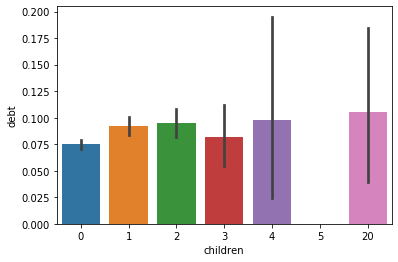

In [694]:
sns.barplot(data=df,x='children',y='debt') 

По колонке `sum` в таблице может сложиться ошибочный вывод, что количество должников среди людей, у которых нет детей, в разы больше, чем у тех, у которых есть дети, а особенно у тех у кого 5 детей, среди них должников вообще нет, но есть разница в том, что и количество бездетных людей, которые просили кредит в разы больше и чтобы не было ошибочных суждений был также подсчитан процент людей, которые не отдали кредит к числу всех заемщиков и для удобства информации представлены в виду графика

##### Вывод 1:

Количество данных по людям у которых 5 детей недостаточно для анализа и поэтому их не берем в расчет. Также очень мало данных о людях, у которых 4 ребенка или же 20 детей, что говорит о том, что данные могут быть не до конца точными. Остальные данные позволяют сделать вывод, что большой зависимости между количеством детей и погашением кредита нет и колеблится в районе 2-3%. Меньше всего долгов не возвращают люди у которых нет детей, больше всего люди с большим количеством детей. Но это лишь незначительная разница.

#### Вопрос 2

##### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [695]:
combine('family_status_id')

,sum,count,percent
,debt,debt,
family_status_id,,,
0,931,12339,7.545182
1,388,4151,9.347145
2,63,959,6.569343
3,85,1195,7.112971
4,274,2810,9.750890


In [696]:
df_pivot = df_family.merge(combine('family_status_id'),on='family_status_id') #добавление в таблицу расшифровки family_status_id
display(df_pivot)

,family_status_id,family_status,"(sum, debt)","(count, debt)","(percent, )"
0,0,женат / замужем,931,12339,7.545182
1,1,гражданский брак,388,4151,9.347145
2,2,вдовец / вдова,63,959,6.569343
3,3,в разводе,85,1195,7.112971
4,4,Не женат / не замужем,274,2810,9.750890


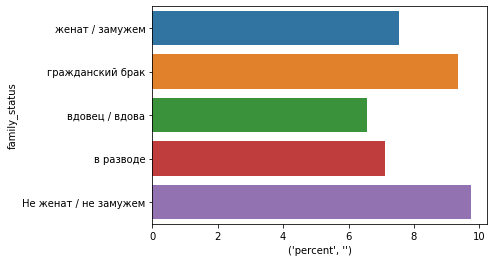

In [697]:
sns.barplot(data=df_pivot,y='family_status',x= ('percent', '')) #создание графиков

##### Вывод 2

После анализа можно сделать вывод, что есть небольшая зависимость между семейным положением и возвратом кредита в срок, но зависимость, также как и с количеством детей небольшая и различается в районе 2%. Больше всего возвращают кредит в срок люди женатые/замужем или в разводе. Чаще всего остаются должниками люди не женатые/не замужем и состоящие в гражданском браке

#### Вопрос 3


##### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?


In [698]:
combine('total_income_category')

,sum,count,percent
,debt,debt,
total_income_category,,,
A,2,25,8.000000
B,356,5041,7.062091
C,1360,16016,8.491508
D,21,350,6.000000
E,2,22,9.090909


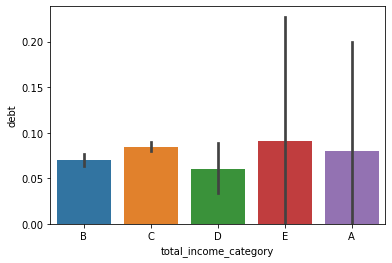

In [699]:
sns.barplot(data=df,x='total_income_category',y='debt')

##### Вывод 3


Данных о категориях людей с доходностями A,D и C слишком мало для достоверного результата. Тем не менее существует небольшая зависимость (также в пределах 2-3%) между уровнем дохода и возвратом кредита в срок. Больше всего вероятность что кредит вернут в срок люди с категориями дохода B и D (но данных о группе D слишком мало как было написано выше), меньше вероятность у групп C и E (ситуация с группой E анологична группе D)

#### Вопрос 4


##### Как разные цели кредита влияют на его возврат в срок?

In [700]:
combine('purpose_category')

,sum,count,percent
,debt,debt,
purpose_category,,,
операции с автомобилем,403,4306,9.359034
операции с недвижимостью,782,10811,7.233373
получение образование,370,4013,9.220035
проведение свадьбы,186,2324,8.003442


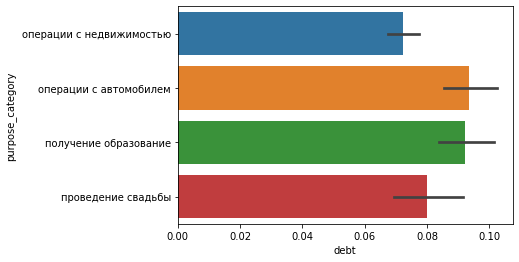

In [701]:
sns.barplot(data=df,y='purpose_category',x='debt')

##### Вывод 4


Количества данных по каждой категории достаточно для анализа, из чего мы можем сделать вывод, что видна также небольшая зависимость между тем, ради чего клиент берет кредит и тем, вернет ли он его в срок. Больше вероятность, что клиент вернут кредит если берет его ради операций с недвижимостью или на проведение свадьбы, меньше шанс, что он вернет его если возьмет на операции с автомобилем или получение образования.

## Общий вывод:

Во время проведения анализа было проверено 4 вопроса и установлено:

1. Существует небольшая зависимость между семейным положением и возвратом кредита в срок.
2. Существует небольшая зависимость между семейным положением и возвратом кредита в срок
3. Существует небольшая зависимость между уровнем дохода и возвратом кредита в срок
4. Существует небольшая зависимость между целью получения кредита и возвратом его в срок

Во всех гипотезах разница между самыми отдающими и неотдающими кредит в срок категориями людей составляла 2-3%

Для полного и более достоверного анализа нужно большее количество информации, так как во многих вопросах была недостаточная выборка людей и некоторые категориями представлялись иногда десятками, а иногда единицами клиентов. 